In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:

import numpy as np
import pandas as pd
import os
import keras
from sklearn.datasets import load_files
from keras.utils import np_utils


from keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
from keras.preprocessing import image
from keras.layers import Dense, GlobalAveragePooling2D,Dropout,Input
# from keras.layers.advanced_activations import LeakyReLU, ELU
from keras.models import Sequential,Model
from keras import backend as K
from IPython.display import display

from keras.preprocessing.image import ImageDataGenerator

import glob
import cv2
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Dense , Dropout,Activation
from keras import layers, optimizers
import tensorflow as tf


import imageio as im
from keras import models
from keras.callbacks import ModelCheckpoint


Using TensorFlow backend.


In [0]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.3)

In [5]:
batch_size=64
img_rows=224
img_cols=224

training_set = train_datagen.flow_from_directory("/content/gdrive/My Drive/Image_Sorter/SortedImages", 
                                                 target_size = (img_rows,img_cols), 
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 subset="training")

test_set = train_datagen.flow_from_directory("/content/gdrive/My Drive/Image_Sorter/SortedImages", 
                                                 target_size = (img_rows,img_cols),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 subset='validation')


Found 7021 images belonging to 7 classes.
Found 3004 images belonging to 7 classes.


In [6]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(img_cols,img_rows,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))

# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer

model.add(BatchNormalization())


# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())


# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation))
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation

model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation

model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(img_cols*img_rows*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(7))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:

ad=optimizers.Adam(lr=0.0012, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0, amsgrad=False)
from keras.metrics import categorical_accuracy, top_k_categorical_accuracy

def top_5_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=5)

def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)



model.compile(loss='categorical_crossentropy', 
              optimizer='adam',\
              metrics=[categorical_accuracy,top_2_accuracy,top_5_accuracy,'accuracy'])


In [16]:
"""""call_early=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1,
                                         mode='auto', baseline=None, restore_best_weights=False)


checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

callbacks_list=[checkpointer,call_early]
"""""

from keras import models
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau




#call_early=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1,
#                                         mode='auto', baseline=None, restore_best_weights=False)


reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=3,
                              verbose=1, mode='max', min_lr=0.00001)

checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_categorical_accuracy',
                               verbose=1, 
                               save_best_only=True)

callbacks_list=[checkpointer,reduce_lr]

history=model.fit_generator(training_set,
                            steps_per_epoch = training_set.samples // batch_size,
                            validation_data = test_set, 
                            validation_steps = test_set.samples // batch_size,
                            callbacks=callbacks_list,
                            epochs =30)


Epoch 1/30
109/109 [==============================] - 2386s 22s/step - loss: 1.3689 - categorical_accuracy: 0.5695 - top_2_accuracy: 0.7199 - top_5_accuracy: 0.9138 - acc: 0.5695 - val_loss: 1.6062 - val_categorical_accuracy: 0.6541 - val_top_2_accuracy: 0.7735 - val_top_5_accuracy: 0.9378 - val_acc: 0.6541

Epoch 00001: val_categorical_accuracy improved from -inf to 0.65408, saving model to best_weights.hdf5
Epoch 2/30
109/109 [==============================] - 222s 2s/step - loss: 1.0289 - categorical_accuracy: 0.6484 - top_2_accuracy: 0.8090 - top_5_accuracy: 0.9699 - acc: 0.6484 - val_loss: 1.6883 - val_categorical_accuracy: 0.6245 - val_top_2_accuracy: 0.7456 - val_top_5_accuracy: 0.9354 - val_acc: 0.6245

Epoch 00002: val_categorical_accuracy did not improve from 0.65408
Epoch 3/30
109/109 [==============================] - 223s 2s/step - loss: 0.9607 - categorical_accuracy: 0.6605 - top_2_accuracy: 0.8132 - top_5_accuracy: 0.9730 - acc: 0.6605 - val_loss: 1.4797 - val_categorica

In [17]:
#@title Default title text
scores=model.evaluate_generator(training_set,steps=10)
print(scores)

[0.6292262226343155, 0.765625, 0.90625, 0.9890625, 0.765625]


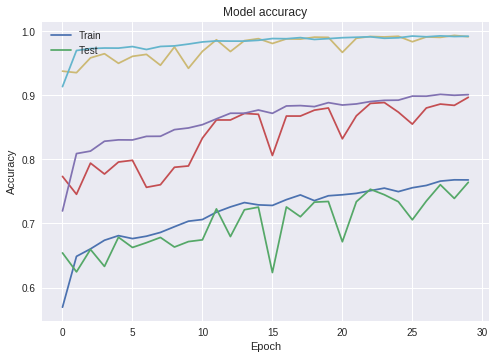

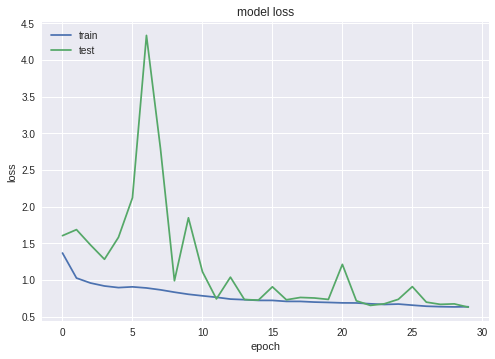

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.plot(history.history['val_top_2_accuracy'])
plt.plot(history.history['top_2_accuracy'])

plt.plot(history.history['val_top_5_accuracy'])
plt.plot(history.history['top_5_accuracy'])
plt.title('Model accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
__________

In [0]:
#model.save("alexNet12.h5")

check=[]

files=(glob.glob("/content/gdrive/My Drive/Image_Sorter/SortedImages/AKIEC/*"))
for myFile in files:
    image = cv2.imread (myFile)
    check.append (image)
    
print(np.array(check).shape)


(327, 450, 600, 3)


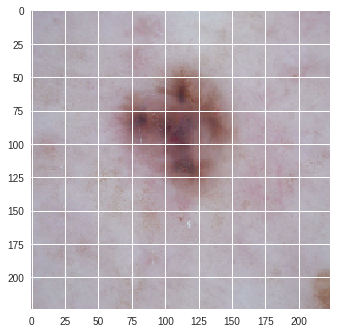

(1, 224, 224, 3)
{'AKIEC': 0, 'BCC': 1, 'BKL': 2, 'DF': 3, 'MEL': 4, 'NV': 5, 'VASC': 6}
Predicted class is: [5]


In [25]:
layer_outputs = [layer.output for layer in model.layers[:14]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

img_path = '/content/gdrive/My Drive/Image_Sorter/SortedImages/BCC/ISIC_0034255.jpg'
img = image.load_img(img_path, target_size=(img_rows, img_cols))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)


label=(training_set.class_indices)
print(label)

# predicting images

# predicting images
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=64)
print("Predicted class is:",classes)

  


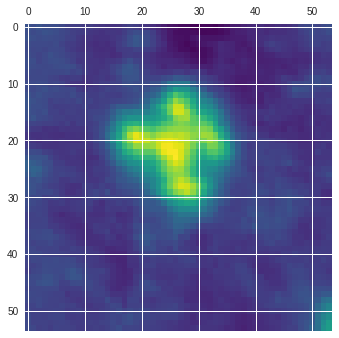

In [28]:

# Returns a list of five Numpy arrays: one array per layer activation

activations = activation_model.predict(img_tensor) 


first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


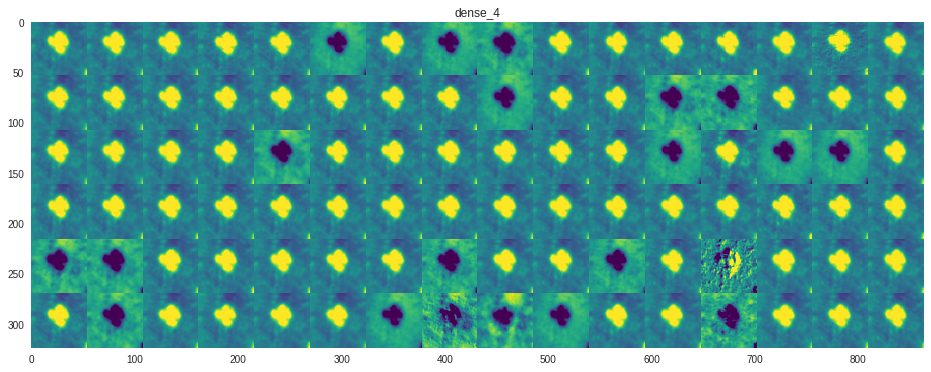

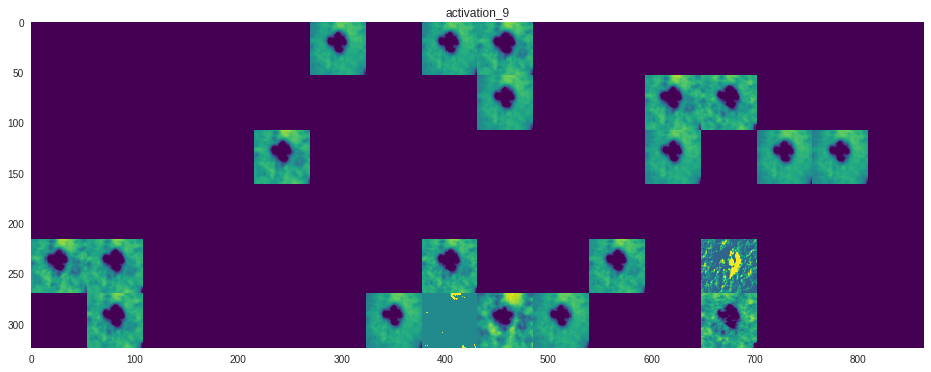

In [31]:
layer_names = []
for layer in model.layers[31:]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')